<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [10]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [11]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [12]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [13]:
npR

array([[-1.3682, -0.5306, -0.4054, -0.9156, -1.3115],
       [ 0.    , -1.0214, -0.4492, -0.3779, -0.3189],
       [ 0.    ,  0.    , -0.8114, -0.3637,  0.0188],
       [ 0.    ,  0.    ,  0.    , -0.4631, -0.1356],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.4811]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [14]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    ##Your Code ends here
    return Q, R

In [15]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [16]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [17]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [18]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i].conj(), V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]

        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
    ##Your Code ends here
    return Q, R

In [19]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [20]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [22]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [23]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

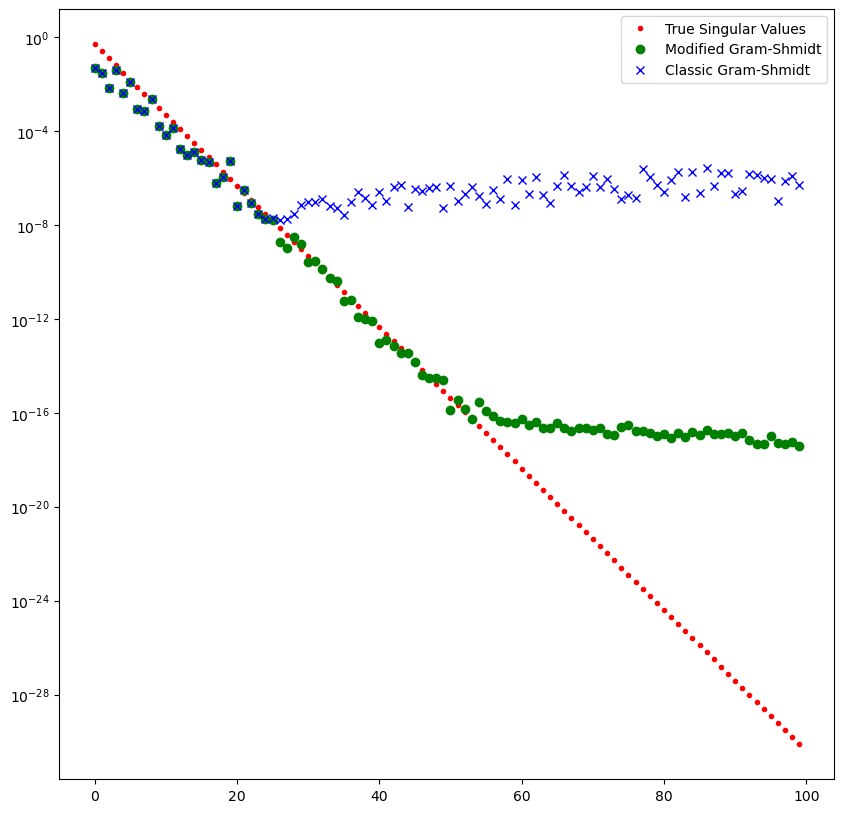

In [24]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [25]:
##Your Code start here
def qr_algorithm(A, iterations):
    n = A.shape[0]
    Ak = A
    for i in range(iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = np.dot(R, Q)
        if i + 1 in [1, 5, 10, 20, 100]:
            print(f"\n--- Iteration {i+1} ---")
            print(sorted(np.diag(Ak)))
##Your Code ends here

In [26]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
qr_algorithm(A, 100)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

--- Iteration 1 ---
[0.0, 1.9999999999999996, 2.0, 3.0]

--- Iteration 5 ---
[-0.24697948641455808, 1.4541002294486143, 2.792879256965946, 3.0]

--- Iteration 10 ---
[-0.24697960371746447, 1.4450540068283573, 2.801925596889109, 3.0]

--- Iteration 20 ---
[-0.24697960371746697, 1.4450418679341384, 2.801937735783328, 3.0]

--- Iteration 100 ---
[-0.24697960371746697, 1.4450418679126298, 2.801937735804839, 3.0]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

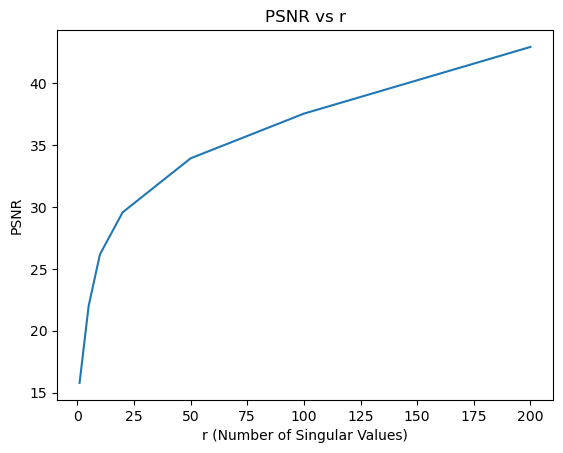

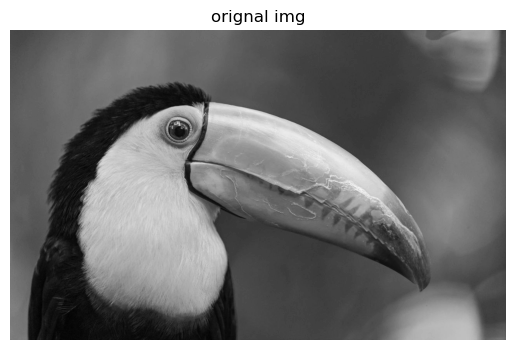

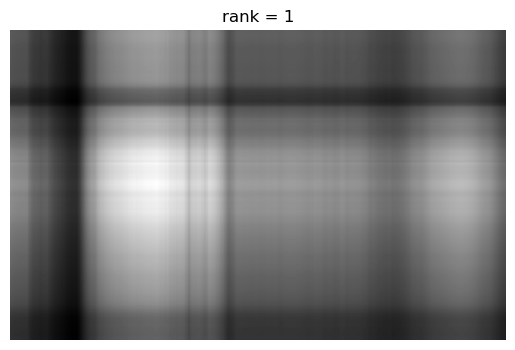

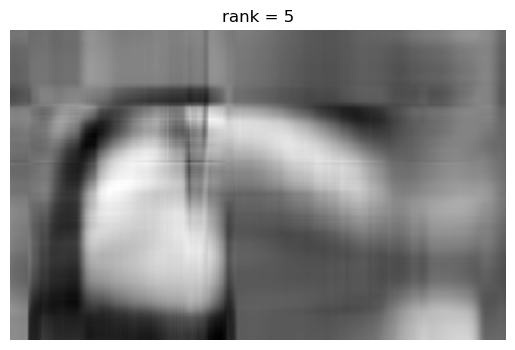

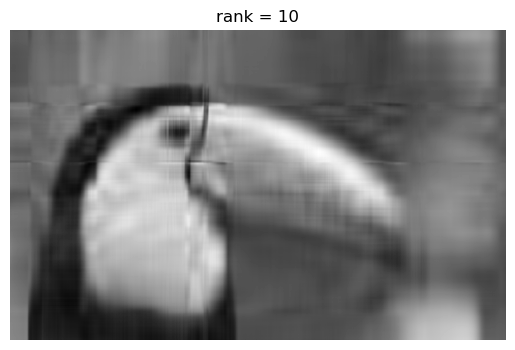

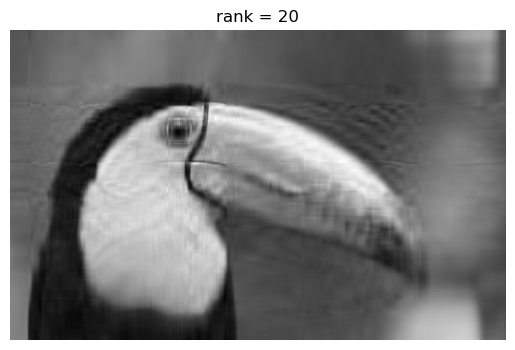

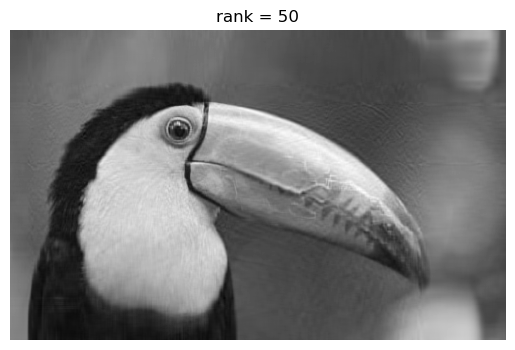

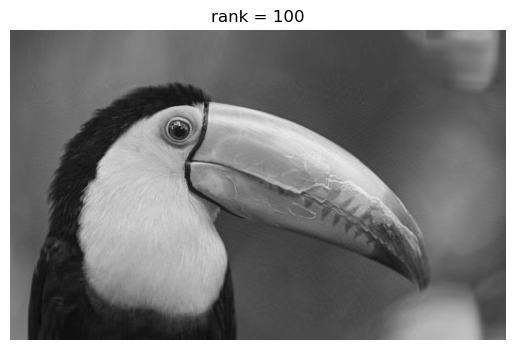

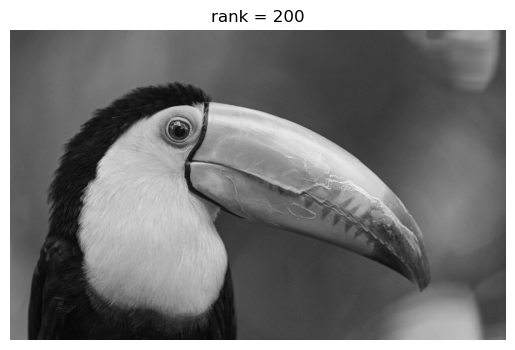

In [26]:
##Your Code start here
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('pic.jpg', 0)

# Perform SVD on the image matrix
U, sigma, Vt = np.linalg.svd(img, full_matrices=False)


def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def compress_svd(U, sigma, Vt, r):
    compressed_sigma = np.diag(sigma[:r])
    compressed_img = np.dot(U[:, :r], np.dot(compressed_sigma, Vt[:r, :]))
    return compressed_img


psnr_values = []
reconstructed_images = []
r_values = [1, 5, 10, 20, 50, 100,200] # Changing r from 1 to 100
for r in r_values:
    compressed_img = compress_svd(U, sigma, Vt, r)
    psnr_val = psnr(img, compressed_img)
    psnr_values.append(psnr_val)
    reconstructed_images.append(np.dot(U[:, :r] * sigma[:r], Vt[:r, :]))

# Plot the PSNR diagram
plt.plot(r_values, psnr_values)
plt.title('PSNR vs r')
plt.xlabel('r (Number of Singular Values)')
plt.ylabel('PSNR')
plt.show()

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(img,cmap='gray')
plt.title(f'orignal img')
plt.grid(False)
plt.axis(False)

for r_img,r in zip(reconstructed_images,r_values):
    plt.figure()
    plt.imshow(r_img,cmap='gray')
    plt.title(f'rank = {r}')
    plt.grid(False)
    plt.axis(False)

plt.show()



##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


PSNR of salt and pepper noise:  38.05761284567384
PSNR of gaussian noise:  29.715712168082213


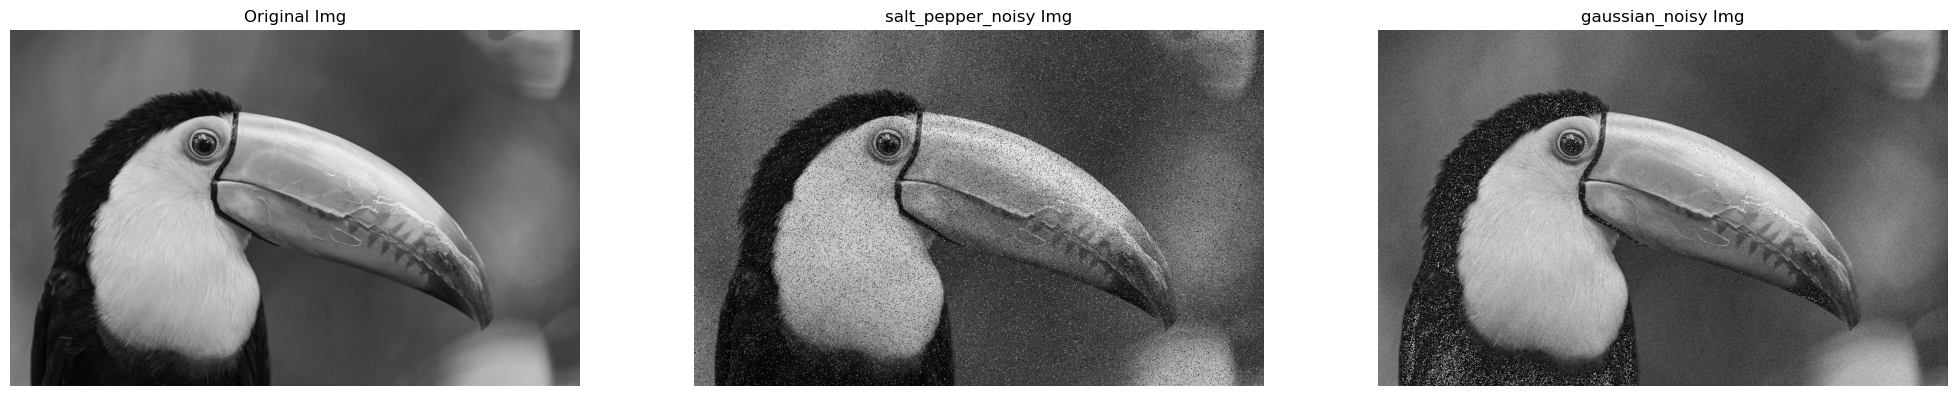

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('pic.jpg', 0)

# Add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_vs_pepper, amount):
    noisy_image = np.copy(image)

    salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i-1, int(salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    pepper = np.ceil(amount * image.size * (1. - salt_vs_pepper))
    coords = [np.random.randint(0, i-1, int(pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Add Gaussian noise
def add_gaussian_noise(image, mean, sigma):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = noisy_image + noise.astype('uint8')
    return np.clip(noisy_image, 0, 255)


def psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    max_intensity = 255
    return 20 * np.log10(max_intensity) - 10 * np.log10(mse)

# Perform SVD analysis for noise reduction
def svd_noise_reduction(image, r):
    U, s, V = np.linalg.svd(image, full_matrices=False)
    denoised_image = np.dot(U[:, :r], np.dot(np.diag(s[:r]), V[:r, :]))
    return denoised_image

# Add salt and pepper noise to the image
salt_pepper_noisy_img = add_salt_and_pepper_noise(img, 0.2, 0.1)  # Salt vs. Pepper = 1:1, noise amount = 1%
# Add Gaussian noise to the image
gaussian_noisy_img = add_gaussian_noise(img, 0, 13)

fig , axes = plt.subplots(figsize=(25,20),ncols=3)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Img')
axes[0].grid(False)
axes[0].axis(False)


axes[1].imshow(salt_pepper_noisy_img, cmap='gray')
axes[1].set_title('salt_pepper_noisy Img')
axes[1].grid(False)
axes[1].axis(False)


axes[2].imshow(gaussian_noisy_img, cmap='gray')
axes[2].set_title('gaussian_noisy Img')
axes[2].grid(False)
axes[2].axis(False);

print("PSNR of salt and pepper noise: ",psnr(img,salt_pepper_noisy_img))
print("PSNR of gaussian noise: ",psnr(img,gaussian_noisy_img))


# Compare the results with the graph


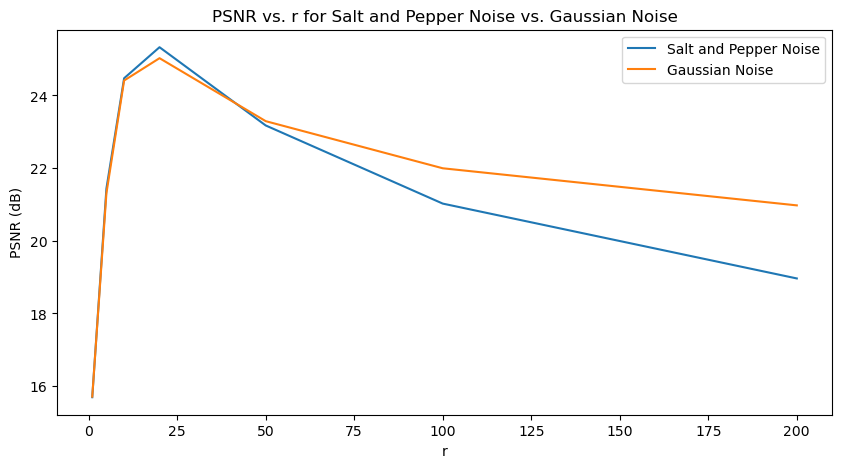

In [87]:
# PSNR diagram in terms of different r
psnr_values_salt_pepper = []
psnr_values_gaussian = []
range_r = [1, 5, 10, 20, 50, 100,200]  # Range of r values to test
reconstructed_images_salt = []
reconstructed_images_guassian = []
for r in range_r:
    denoised_salt_pepper = svd_noise_reduction(salt_pepper_noisy_img, r)
    reconstructed_images_salt.append(denoised_salt_pepper)
    denoised_gaussian = svd_noise_reduction(gaussian_noisy_img, r)
    reconstructed_images_guassian.append(denoised_gaussian)

    psnr_values_salt_pepper.append(psnr(img, denoised_salt_pepper))
    psnr_values_gaussian.append(psnr(img, denoised_gaussian))

# Plot PSNR diagram in terms of different r for both noises
plt.figure(figsize=(10, 5))
plt.plot(range_r, psnr_values_salt_pepper, label='Salt and Pepper Noise')
plt.plot(range_r, psnr_values_gaussian, label='Gaussian Noise')
plt.xlabel('r')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs. r for Salt and Pepper Noise vs. Gaussian Noise')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Gaussian Denoised Image')

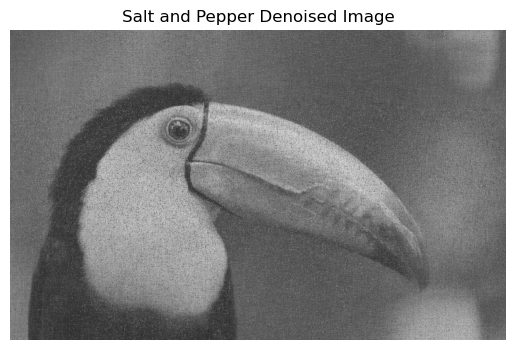

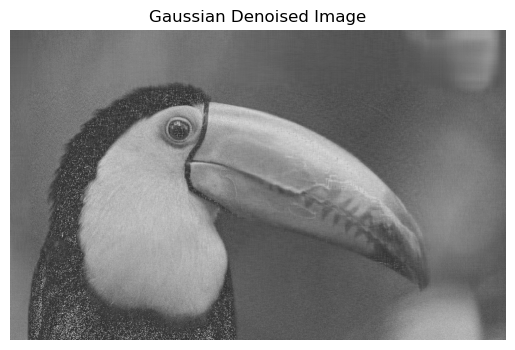

In [89]:
plt.figure()
plt.imshow(reconstructed_images_salt[6],cmap='gray')
plt.grid(False)
plt.axis(False)
plt.title('Salt and Pepper Denoised Image')

plt.figure()
plt.imshow(reconstructed_images_guassian[6],cmap='gray')
plt.grid(False)
plt.axis(False)
plt.title('Gaussian Denoised Image')

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [2]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

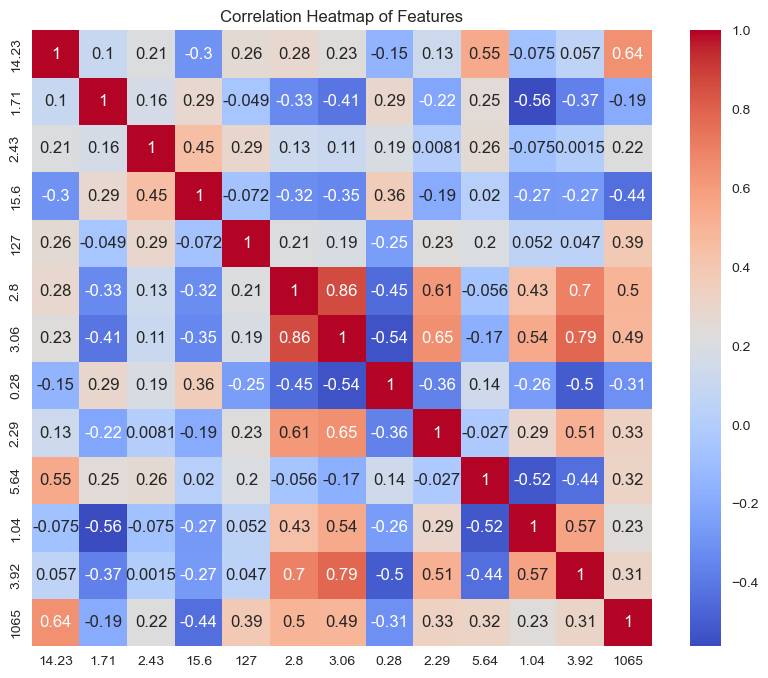

In [3]:
##Your Code start here
correlation_matrix = Datapoint.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [4]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

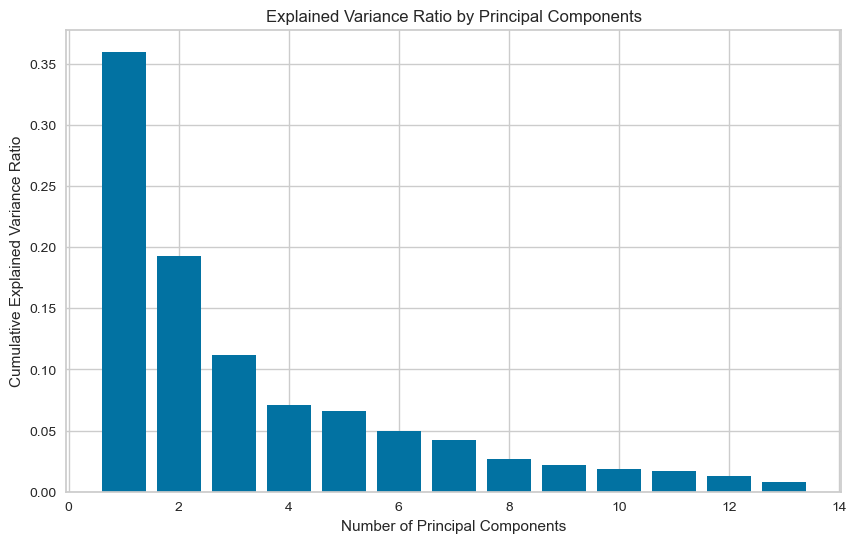

In [5]:
##Your Code start here
# Standardize the data
standardized_data = (Datapoint - Datapoint.mean()) / Datapoint.std()

# Perform PCA
covariance_matrix = standardized_data.T@standardized_data
# covariance_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(x=range(1,len(explained_variance_ratio)+1), height=explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()


##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [6]:
k = 11
top_eigenvectors = eigenvectors[:, :k]
reduced_data = np.dot(standardized_data, top_eigenvectors)

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

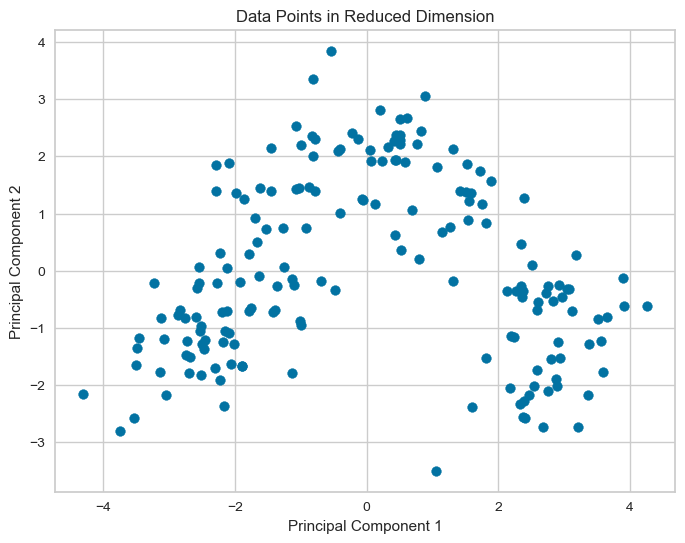

In [9]:
##Your Code start here
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data Points in Reduced Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Your Code ends here

it seems that 3 will be a good choice

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




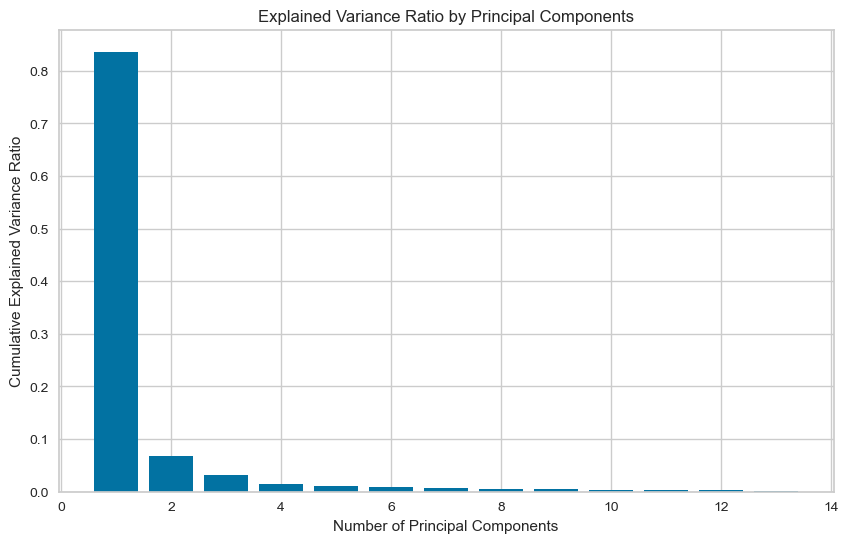

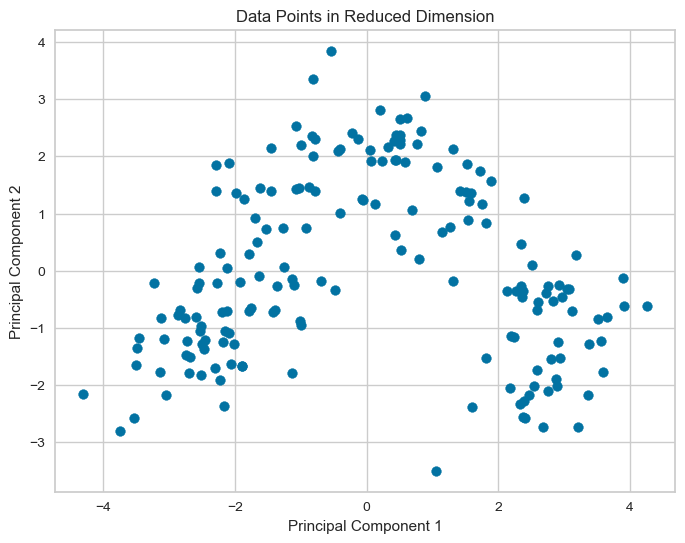

In [24]:
##Your Code start here
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
covariance_matrix_minmax = scaler.fit_transform(Datapoint)
covariance_matrix_minmax = (covariance_matrix_minmax.T@covariance_matrix_minmax)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix_minmax)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(10, 6))
plt.bar(x=range(1,len(explained_variance_ratio)+1), height=explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()


k = 2
top_eigenvectors = eigenvectors[:, :k]
reduced_data_minmax = np.dot(standardized_data, top_eigenvectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data Points in Reduced Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Your Code ends here

1. Min-Max Scaling:
   - Min-max scaling transforms the features by scaling them to a specified range, typically between 0 and 1.
   - The formula for min-max scaling is:
     $$ X_{\text{scaled}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}} $$
     where $ X $ is the original value, $ X_{\text{min}} $ is the minimum value in the feature, and $( X_{\text{max}} $) is the maximum value in the feature.
   - This scaling preserves the shape of the original distribution, but in some situations, it might not handle outliers well.

2. Standard Scaling (Z-score normalization):
   - Standard scaling transforms the features so that they have a mean of 0 and a standard deviation of 1.
   - The formula for standard scaling is:
     $$ X_{\text{scaled}} = \frac{{X - \mu}}{{\sigma}} $$
     where \( X \) is the original value, $ \mu $ is the mean of the feature, and $ \sigma $ is the standard deviation of the feature.
   - This scaling centers the data around 0 and expresses each value in terms of the number of standard deviations it lies from the mean. It is better at dealing with outliers compared to min-max scaling.

Differences between MinMax Scaling and Standard Scaling:

1. Scale Range:
   - MinMax Scaling: Squeezes the data into the range of 0-1, keeping the original data shape but freaking out a lot if there are crazy outliers.
   - Standard Scaling: Squishes the data to have an average of 0 and a spread of 1, kind of recentering everything and not getting too bent out of shape by outliers.

2. Impact on Outliers:
   - MinMax Scaling: Gets thrown off by outliers, so they can really mess up the whole 0-1 vibe.
   - Standard Scaling: Takes outliers in stride since it focuses on the average and spread, which aren't swayed too much by extreme values.

3. Interpretability:
   - MinMax Scaling: Keeps the original data range, which is nice if you want to understand the original values.
   - Standard Scaling: Centers things around zero, which is handy for interpreting everything as if it's following a standard pattern.

4. Algorithm Sensitivity:
   - MinMax Scaling: Works well with algorithms that care about distances or slopes, like k-nearest neighbors and gradient descent.
   - Standard Scaling: Generally a safe bet for most algorithms, especially those that assume a normal distribution of features.

5. Use Cases:
   - MinMax Scaling: Good when your features have clear minimum and maximum values and you want to keep the relative relationships intact.
   - Standard Scaling: Handy when your features have different units or scales and you want them to play equally nice in your analysis or modeling.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


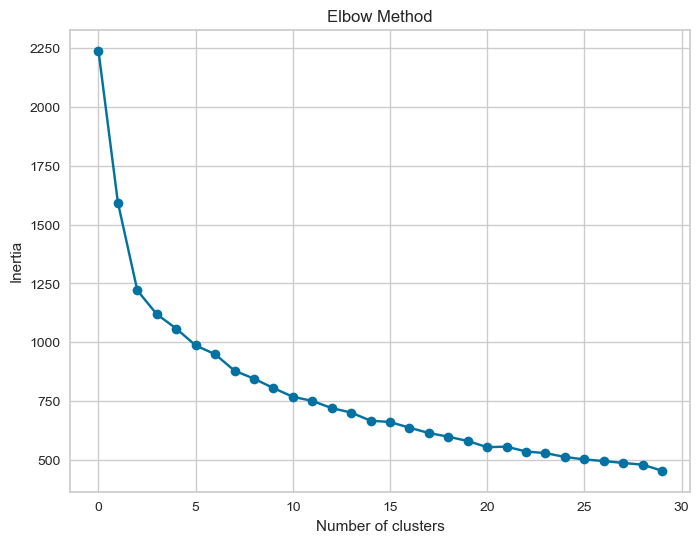

In [11]:
##Your Code start here
n_init = 30
N = 1+n_init
wcss = []
for k in range(1, N):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




Inertia, also known as within-cluster sum of squares, is a metric used in clustering to measure how internally coherent the clusters are. It calculates the sum of squared distances between each data point and the centroid of its assigned cluster. Lower inertia values indicate that the data points within each cluster are closer to the centroid, suggesting more compact and well-defined clusters.

On the other hand, silhouette score is a metric that measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A silhouette score close to 1 suggests that the clusters are well-separated, while a score close to -1 indicates that the data point may have been assigned to the wrong cluster.

In summary, inertia measures the compactness of the clusters, while silhouette score measures the separation between clusters. These metrics are important in evaluating the quality of a clustering algorithm's results.

In [12]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint = reduced_data
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

 25%|██▌       | 2/8 [00:00<00:00, 14.77it/s]

100%|██████████| 8/8 [00:00<00:00, 12.08it/s]


In [13]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 11.37it/s]


Plot the **inertia** and **silhouette ** values

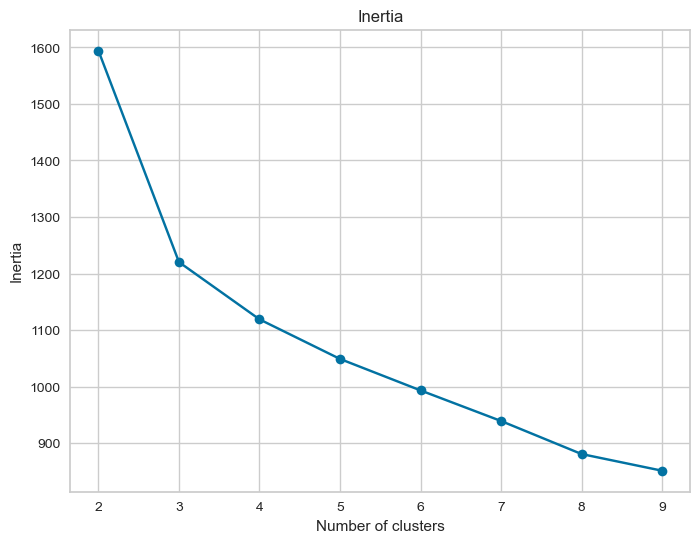

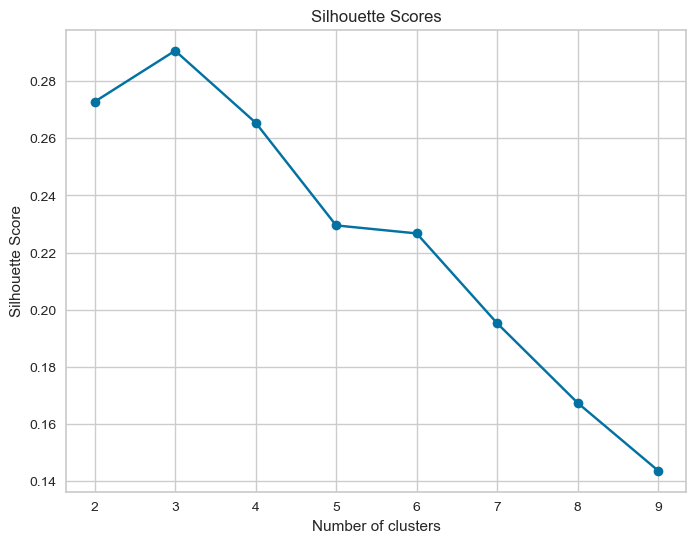

In [14]:
##Your Code start here

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [15]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

#Now plot the datapoints usig two first features
(Each cluster in a different colour)

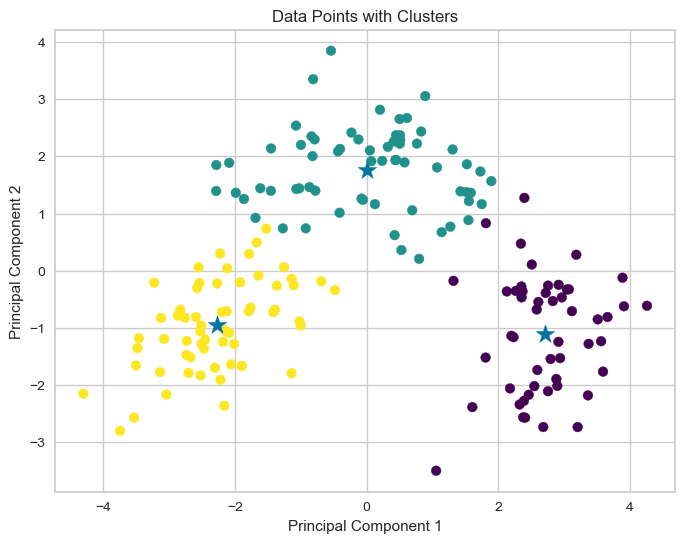

In [16]:

plt.figure(figsize=(8, 6))
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap='viridis')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=200, color='b',)

plt.title('Data Points with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Do all previous steps for MinMax scaled data points.





c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


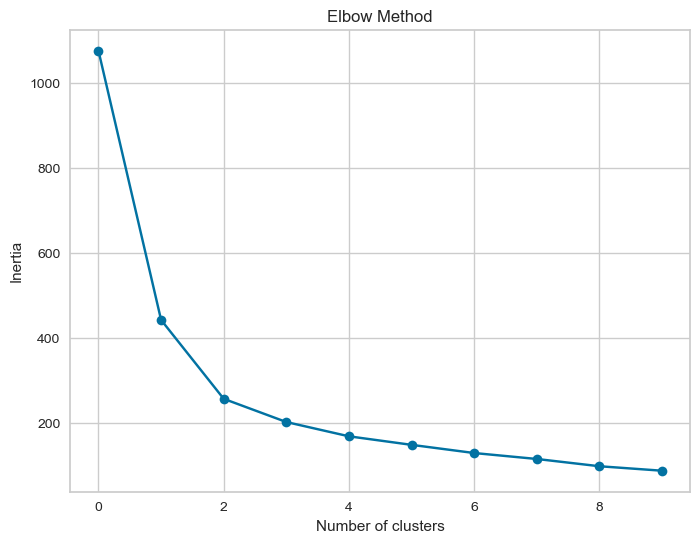

In [17]:
##Your Code start here
n_init = 10
N = 1+n_init
wcss = []
for k in range(1, N):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data_minmax)
    wcss.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##Your Code ends here

In [18]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint = reduced_data_minmax
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)
    

100%|██████████| 8/8 [00:01<00:00,  7.91it/s]


In [19]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 11.04it/s]


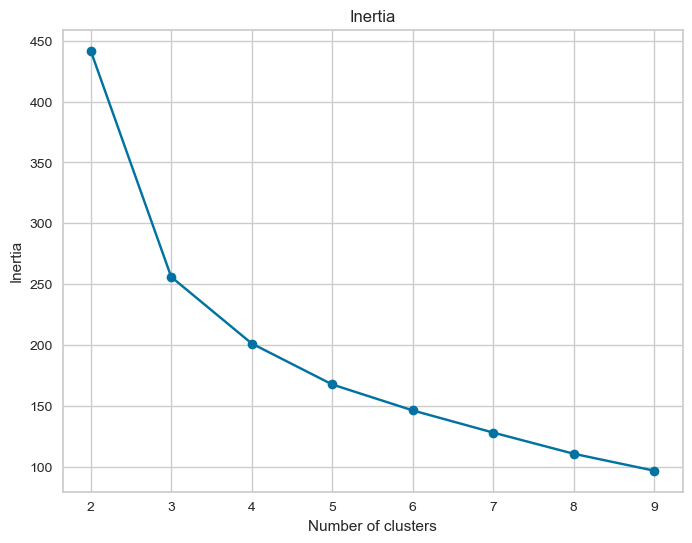

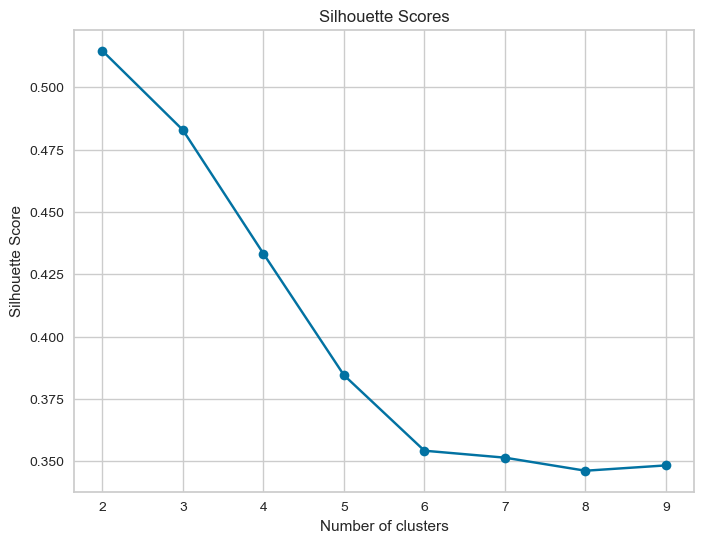

In [20]:
##Your Code start here

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##Your Code ends here

In [21]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

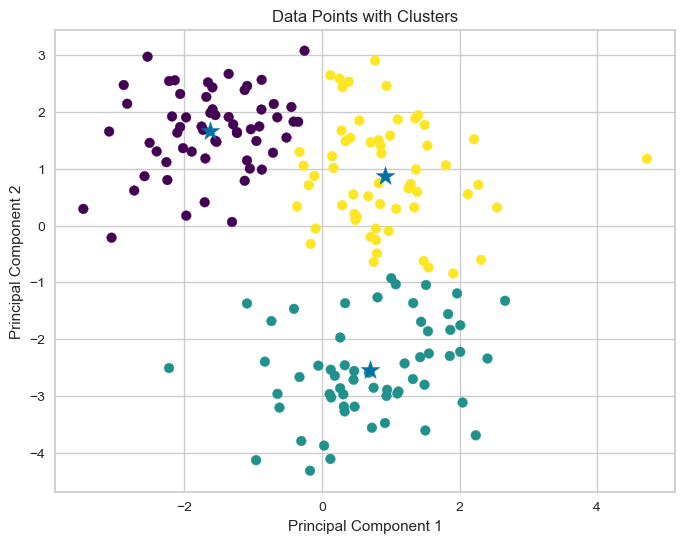

In [22]:

plt.figure(figsize=(8, 6))
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap='viridis')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=200, color='b',)

plt.title('Data Points with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Compare the results of different scaling methods in a PCA problem

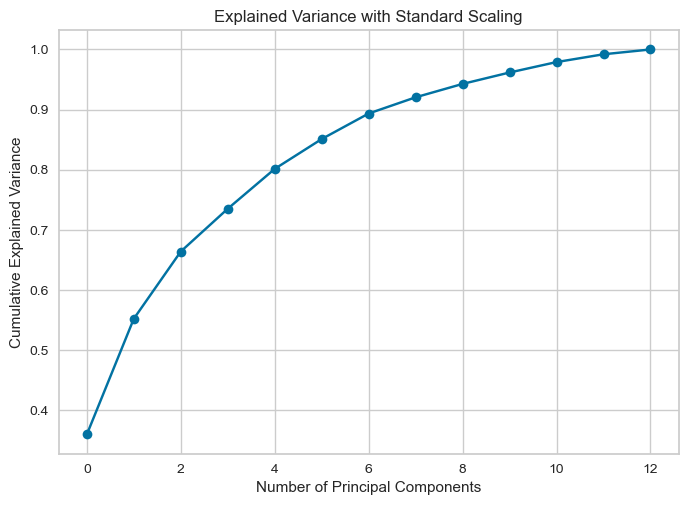

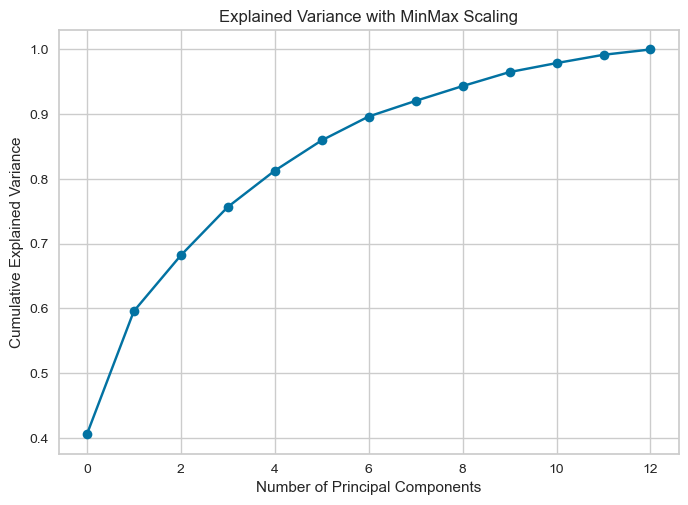

In [28]:
# Perform PCA with Standard Scaling
from sklearn.decomposition import PCA
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(Datapoint)

pca_standard = PCA()
pca_result_standard = pca_standard.fit_transform(scaled_data_standard)
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(Datapoint)
pca_minmax = PCA()
pca_result_minmax = pca_minmax.fit_transform(scaled_data_minmax)


plt.figure()
plt.plot(np.cumsum(pca_standard.explained_variance_ratio_), marker='o')
plt.title('Explained Variance with Standard Scaling')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.figure()
plt.plot(np.cumsum(pca_minmax.explained_variance_ratio_), marker='o')
plt.title('Explained Variance with MinMax Scaling')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)


if you look at the plot of data after clustering you can see that standard scaling seem to have better distinguishable clusters althogh that might be becuase of choice of k in PCA we used lesser k in min max scaling because most of the varince was in the first component